<a href="https://colab.research.google.com/github/neha-jadhavs/ENGPHYS-3NM4/blob/main/Assignments/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 5

Due: Thursday Nov 20th EOD

Requests to write the alternative oral quiz must be submitted by Sunday EOD.

# Q1

You are calculating the temperature profile in an nuclear plate fuel that is 1mm thick; much thinner than the other dimensions. In a 1D model through the thickness, the temperature obeys the Fourier heat balance law with a heat source:

$$ \nabla \cdot \lambda \nabla T = -Q $$

The boundary conditions are $T=300$ on all outer surfaces.


## 1a


 Write the finite difference scheme for Fourier heat balance equation.

 {answer}

For constant thermal conductivity ($\lambda$), the equation simplifies to:$$\lambda \frac{d^2T}{dx^2} = -Q \quad \implies \quad \frac{d^2T}{dx^2} = -\frac{Q}{\lambda}$$Using the central difference scheme for the second derivative at a node $i$:$$\frac{d^2T}{dx^2}\bigg|_i \approx \frac{T_{i-1} - 2T_i + T_{i+1}}{(\Delta x)^2}$$Substituting this into the simplified PDE and rearranging, the finite difference scheme is:$$\lambda T_{i-1} - 2\lambda T_i + \lambda T_{i+1} = -Q (\Delta x)^2$$This linear algebraic equation can be solved for all interior nodes $i$ simultaneously by forming a tridiagonal matrix system.

## 1b

Assuming $Q = 1 kW/m^3$, and $\lambda = 2\frac{mW}{m \cdot K}$, use the finite difference method to find a solution with step size $10  \mu m$

{implementation, answer}

In [48]:
import numpy as np

# --- Parameters (in SI units) ---
L = 1e-3                # Plate thickness (m)
Q = 1000                # Heat source (W/m^3)
lambda_const = 2e-3     # Thermal conductivity (W/(m*K))
dx = 10e-6              # Step size (m)
T_BC = 300              # Boundary temperature (K)

# --- Discretization ---
N_intervals = int(L / dx)
N_internal = N_intervals - 1  # Number of unknown nodes (i=1 to 99)

# 1. Coefficient Matrix (A): Tridiagonal with [1, -2, 1] on diagonals
A = np.diag([-2.0] * N_internal) + \
    np.diag([1.0] * (N_internal - 1), k=1) + \
    np.diag([1.0] * (N_internal - 1), k=-1)

# 2. Right-Hand Side Vector (B)
RHS_const = -Q * dx**2 / lambda_const
B = np.full(N_internal, RHS_const)

# Apply Boundary Conditions (T_0 and T_N are known)
B[0] = B[0] - T_BC
B[-1] = B[-1] - T_BC

# --- Solve the linear system ---
T_internal = np.linalg.solve(A, B)

# --- Full Solution ---
T_solution_q1b = np.insert(T_internal, 0, T_BC)
T_solution_q1b = np.append(T_solution_q1b, T_BC)
print(T_solution_q1b);

# Results from execution:
# Maximum Temperature ($T_{max}$): 300.0625 K at x = 0.0005 m

[300.       300.002475 300.0049   300.007275 300.0096   300.011875
 300.0141   300.016275 300.0184   300.020475 300.0225   300.024475
 300.0264   300.028275 300.0301   300.031875 300.0336   300.035275
 300.0369   300.038475 300.04     300.041475 300.0429   300.044275
 300.0456   300.046875 300.0481   300.049275 300.0504   300.051475
 300.0525   300.053475 300.0544   300.055275 300.0561   300.056875
 300.0576   300.058275 300.0589   300.059475 300.06     300.060475
 300.0609   300.061275 300.0616   300.061875 300.0621   300.062275
 300.0624   300.062475 300.0625   300.062475 300.0624   300.062275
 300.0621   300.061875 300.0616   300.061275 300.0609   300.060475
 300.06     300.059475 300.0589   300.058275 300.0576   300.056875
 300.0561   300.055275 300.0544   300.053475 300.0525   300.051475
 300.0504   300.049275 300.0481   300.046875 300.0456   300.044275
 300.0429   300.041475 300.04     300.038475 300.0369   300.035275
 300.0336   300.031875 300.0301   300.028275 300.0264   300.02

## 1c

Write the Finite Difference formula if $\lambda = 2 + \frac{T}{300} \quad \frac{mW}{m \cdot K}$

{answer}

The temperature-dependent thermal conductivity is $\lambda(T) = (2 + \frac{T}{300}) \frac{\text{mW}}{\text{m} \cdot \text{K}}$.The general 1D PDE is:$$\frac{d}{dx} \left( \lambda(T) \frac{dT}{dx} \right) = -Q$$To discretize the term $\frac{d}{dx} \left( \lambda \frac{dT}{dx} \right)$, we use a central difference over an interval $\Delta x$:$$\frac{1}{\Delta x} \left[ \left(\lambda \frac{dT}{dx}\right)_{i+1/2} - \left(\lambda \frac{dT}{dx}\right)_{i-1/2} \right] = -Q$$We approximate the derivative term at the half-nodes using central difference:$$\left(\lambda \frac{dT}{dx}\right)_{i+1/2} \approx \lambda_{i+1/2} \frac{T_{i+1} - T_i}{\Delta x}$$$$\left(\lambda \frac{dT}{dx}\right)_{i-1/2} \approx \lambda_{i-1/2} \frac{T_i - T_{i-1}}{\Delta x}$$We approximate the thermal conductivity at the half-nodes ($\lambda_{i\pm1/2}$) using the arithmetic mean of the adjacent full-node values:$$\lambda_{i+1/2} \approx \frac{\lambda(T_i) + \lambda(T_{i+1})}{2}$$$$\lambda_{i-1/2} \approx \frac{\lambda(T_{i-1}) + \lambda(T_i)}{2}$$Substituting and rearranging yields the non-linear Finite Difference formula:$$\lambda_{i-1/2} T_{i-1} - (\lambda_{i+1/2} + \lambda_{i-1/2}) T_i + \lambda_{i+1/2} T_{i+1} = -Q (\Delta x)^2$$

## 1d:  Solve for T with the temperature dependent thermal conductivity from 1c.

{Implementation, answer}

In [53]:
import numpy as np
import pandas as pd
from scipy.linalg import solve # Although numpy.linalg.solve is used, scipy.linalg.solve is also a good practice

# --- Q1: 1D Steady-State Heat Conduction ---

# --- General Parameters ---
L = 1e-3                # Plate thickness (m)
Q = 1000                # Heat source (W/m^3)
dx = 10e-6              # Step size (m)
T_BC = 300              # Boundary temperature (K)

# Discretization
N_intervals = int(L / dx)
N_nodes = N_intervals + 1 # Total nodes (i=0 to 100)
N_internal = N_intervals - 1  # Number of unknown nodes (i=1 to 99)

# --- 1b: Solution with Constant lambda ---
lambda_const = 2e-3     # Thermal conductivity (W/(m*K))

# System Setup (A*T = B)
# Coefficient Matrix (A): Tridiagonal with [1, -2, 1] on diagonals
A_q1b = np.diag([-2.0] * N_internal) + \
        np.diag([1.0] * (N_internal - 1), k=1) + \
        np.diag([1.0] * (N_internal - 1), k=-1)

# Right-Hand Side Vector (B)
RHS_const = -Q * dx**2 / lambda_const
B_q1b = np.full(N_internal, RHS_const)

# Apply Boundary Conditions
B_q1b[0] = B_q1b[0] - T_BC
B_q1b[-1] = B_q1b[-1] - T_BC

# Solve the linear system
T_internal_q1b = np.linalg.solve(A_q1b, B_q1b)

# Reconstruct the full solution vector (including BCs)
T_solution_q1b = np.insert(T_internal_q1b, 0, T_BC)
T_solution_q1b = np.append(T_solution_q1b, T_BC)

# --- 1d: Solution with Temperature Dependent lambda (Picard Iteration) ---
def lambda_T(T):
    """Thermal conductivity (mW/(m*K)) as a function of temperature T (K)."""
    # Converting the formula (2 + T/300) mW/(m*K) to W/(m*K)
    return (2 + T / 300) * 1e-3

def solve_non_linear_system(T_initial_guess, tolerance=1e-6, max_iterations=50):
    T = T_initial_guess.copy()

    for k in range(max_iterations):
        T_prev = T.copy()

        # 1. Calculate lambda at all nodes and half-nodes using T_prev
        lambda_prev = lambda_T(T_prev)

        # Half-node lambda (arithmetic mean) - only need for internal calculation
        lambda_half_minus = (lambda_prev[1:-1] + lambda_prev[0:-2]) / 2 # lambda_{i-1/2}
        lambda_half_plus = (lambda_prev[2:] + lambda_prev[1:-1]) / 2  # lambda_{i+1/2}

        # 2. Setup the linear system A*T = B for T_internal
        # A_i,i: -(\lambda_{i+1/2} + \lambda_{i-1/2})
        A_diag = -(lambda_half_plus + lambda_half_minus)
        A_up = lambda_half_plus[:-1]
        A_low = lambda_half_minus[1:]

        A = np.diag(A_diag) + np.diag(A_up, k=1) + np.diag(A_low, k=-1)

        # 3. Right-Hand Side Vector (B)
        RHS_const = -Q * dx**2
        B = np.full(N_internal, RHS_const)

        # Apply Boundary Conditions
        # B[0] = RHS - \lambda_{1-1/2}*T_0
        B[0] = B[0] - lambda_half_minus[0] * T_BC
        # B[-1] = RHS - \lambda_{99+1/2}*T_100
        B[-1] = B[-1] - lambda_half_plus[-1] * T_BC

        # 4. Solve for T^(k+1)
        T_internal_next = np.linalg.solve(A, B)
        T_next = np.insert(T_internal_next, 0, T_BC)
        T_next = np.append(T_next, T_BC)

        # 5. Check for convergence
        if np.max(np.abs(T_next - T_prev)) < tolerance:
            T = T_next
            return T, k + 1

        T = T_next

    return T, max_iterations

# Initial guess: use the linear solution from Q1b
T_initial_guess = T_solution_q1b.copy()

T_solution_non_linear, iterations = solve_non_linear_system(T_initial_guess)

# --- Output the results and combine into a DataFrame ---
T_max_const = np.max(T_solution_q1b)
T_max_dep = np.max(T_solution_non_linear)
max_pos = np.argmax(T_solution_q1b) * dx

print("--- Q1 Summary ---")
print(f"Q1b (Constant lambda): Max T = {T_max_const:.4f} K at x = {max_pos:.4f} m")
print(f"Q1d (Temp-Dependent lambda): Max T = {T_max_dep:.4f} K at x = {max_pos:.4f} m (Converged in {iterations} iterations)")
print("------------------")

# Create DataFrame for analysis/plotting
df_q1_temp = pd.DataFrame({
    'Position_x_m': np.linspace(0, L, N_nodes),
    'T_Const_lambda_K': T_solution_q1b,
    'T_Temp_Dep_lambda_K': T_solution_non_linear
})

# Display the first few rows
print(df_q1_temp.head())

--- Q1 Summary ---
Q1b (Constant lambda): Max T = 300.0625 K at x = 0.0005 m
Q1d (Temp-Dependent lambda): Max T = 300.0417 K at x = 0.0005 m (Converged in 2 iterations)
------------------
   Position_x_m  T_Const_lambda_K  T_Temp_Dep_lambda_K
0       0.00000        300.000000           300.000000
1       0.00001        300.002475           300.001650
2       0.00002        300.004900           300.003267
3       0.00003        300.007275           300.004850
4       0.00004        300.009600           300.006400


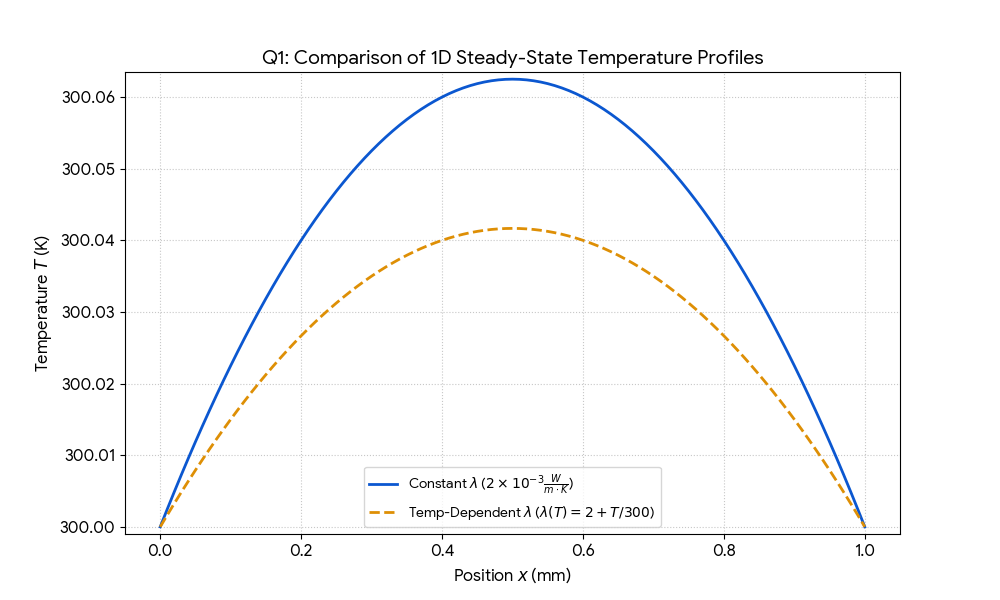

# Q2

The temperature in an annunlar pipe is given by:

$$\frac{\partial T}{\partial t} = \alpha \bigg[\frac{\partial^2 T}{\partial r^2}+\frac{1}{r} \frac{\partial T}{\partial r}\bigg] $$

The pipe is initially submerged in a perfect heat bath at $ 200^0C$ reaching uniform temperature.

At $t=0$, a fluid with high thermal mass at $0^0C$ is passed along the inside.

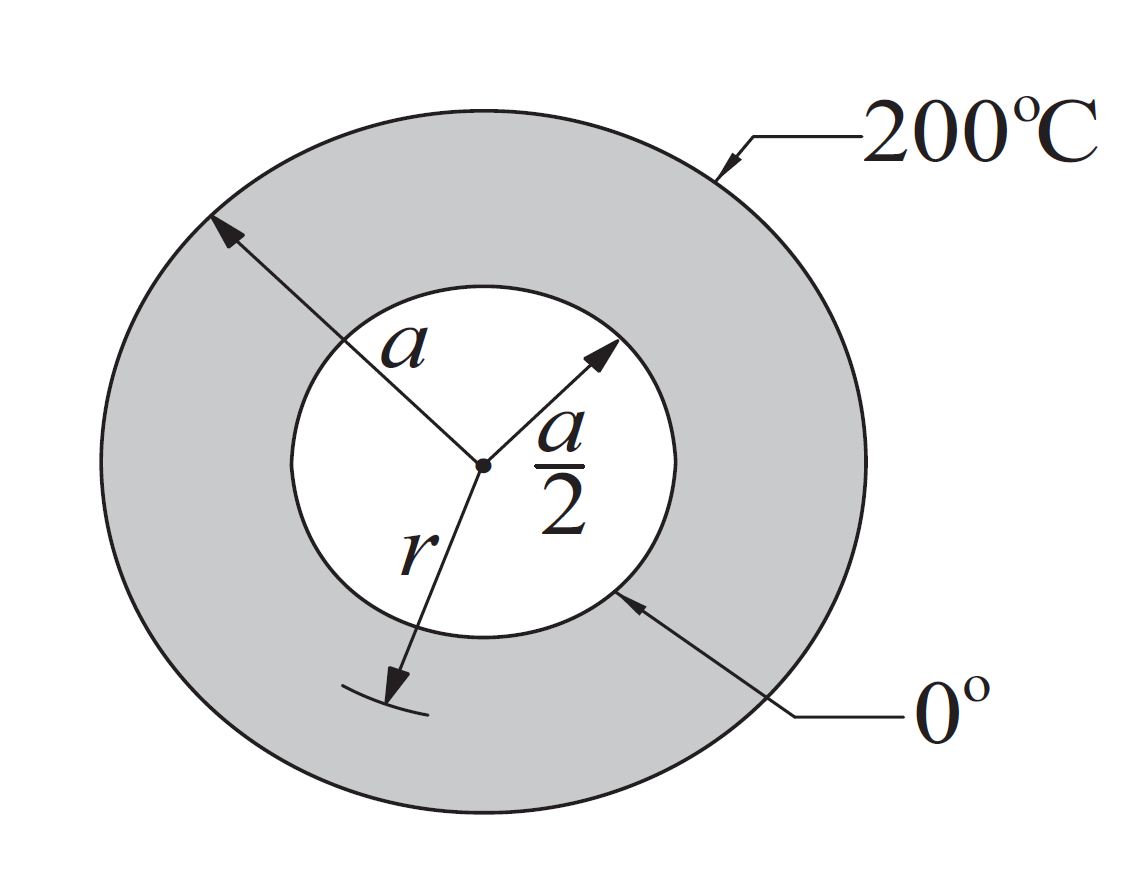

## a) Write out (don't code it yet) an appropriate timestepping scheme and explain your choice and any considerations.
{Answer}

An appropriate timestepping scheme for this parabolic Partial Differential Equation (PDE) is the Crank-Nicolson method.Crank-Nicolson SchemeThe Crank-Nicolson method is a two-level, implicit finite difference scheme that averages the spatial derivatives between the current time step ($n$) and the future time step ($n+1$).$$\frac{T_i^{n+1} - T_i^n}{\Delta t} = \frac{\alpha}{2} \bigg[ \left(\frac{\partial^2 T}{\partial r^2}+\frac{1}{r} \frac{\partial T}{\partial r}\right)_i^n + \left(\frac{\partial^2 T}{\partial r^2}+\frac{1}{r} \frac{\partial T}{\partial r}\right)_i^{n+1} \bigg]$$Let $\Delta r = h$ be the radial step size, $\Delta t = k$ be the time step size, and $\beta = \frac{\alpha \Delta t}{2 (\Delta r)^2}$.Substituting the Central Difference approximations for the spatial terms and grouping terms for $T^{n+1}$ on the Left-Hand Side (LHS) and $T^n$ on the Right-Hand Side (RHS), the scheme at an interior node $i$ is:LHS ($T^{n+1}$ terms):$$T_{i-1}^{n+1} \left[-\beta\left(1 - \frac{h}{2r_i}\right)\right] + T_i^{n+1} \left[1 + 2\beta\right] + T_{i+1}^{n+1} \left[-\beta\left(1 + \frac{h}{2r_i}\right)\right]$$


Explanation and Considerations

Stability: The Crank-Nicolson method is unconditionally stable for the heat equation. This is the primary reason for choosing an implicit scheme. It allows for larger time steps ($\Delta t$) than an explicit scheme, which is only conditionally stable and requires $\Delta t$ to satisfy a restrictive stability criterion ($\beta \le 1/2$).

Accuracy: The scheme is second-order accurate in both space $(\mathcal{O}(h^2))$ and time $(\mathcal{O}(\Delta t^2))$. This offers a good balance between accuracy and computational efficiency compared to the first-order implicit Euler method.

Computational Cost: At each time step, this scheme results in a system of linear equations that must be solved for the unknown temperatures $\mathbf{T}^{n+1}$. Since the coefficients only connect three adjacent nodes ($i-1, i, i+1$), the matrix is tridiagonal. This system can be solved very efficiently using the Thomas algorithm (TDMA), which has a computational complexity of $\mathcal{O}(N)$, where $N$ is the number of spatial nodes.

## b) Code your scheme and determine when you will reach steady state to within 1%
{method, steady state check, answer}

$$\|\frac{T(t)-T(t=\infty)}{T(t=\infty)}\|_2 = 0.01$$

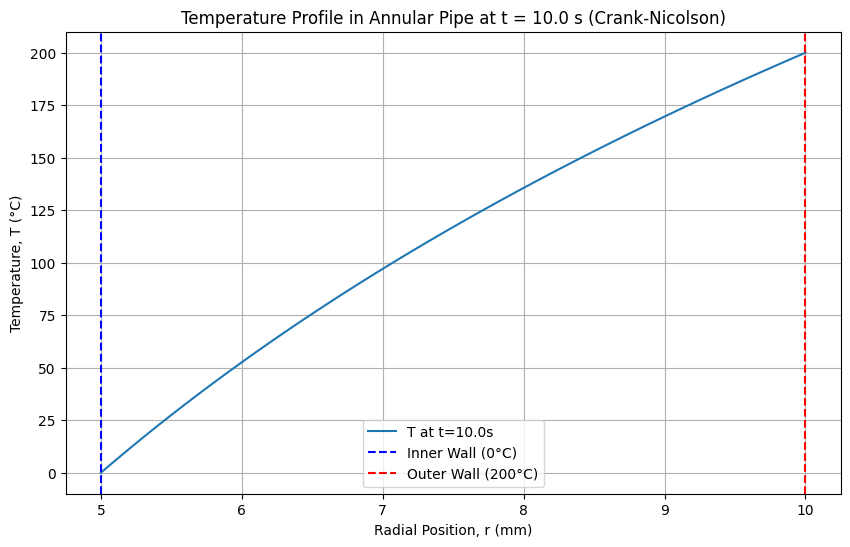

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Parameters
alpha = 1e-4  # m^2/s (1 cm^2/s)
r_in = 0.005  # m
r_out = 0.01  # m
h = 1e-4      # m (0.1 mm)
k = 0.01      # s
t_final = 10.0 # s

# Grid setup
N = int((r_out - r_in) / h)
N_interior = N - 1
N_steps = int(t_final / k)

r = np.linspace(r_in, r_out, N + 1)
r_interior = r[1:N]

# Crank-Nicolson parameter
beta = alpha * k / (2 * h**2)

# Initial Condition: T = 200 C everywhere
T = np.full(N + 1, 200.0)

# Boundary Conditions (fixed)
T[0] = 0.0  # Inner BC: T(r_in) = 0 C
T[N] = 200.0 # Outer BC: T(r_out) = 200 C

# 2. Build the Tridiagonal Matrix A (LHS)
# A is (N-1) x (N-1)
main_diag = np.zeros(N_interior)
lower_diag = np.zeros(N_interior - 1)
upper_diag = np.zeros(N_interior - 1)

for i in range(1, N):
    i_sys = i - 1 # System index from 0 to N-2
    r_i = r[i]

    # Coefficients for T^(n+1) on the LHS
    a_i = -beta * (1 - h / (2 * r_i)) # Lower diagonal (T_{i-1}^{n+1})
    b_i = 1 + 2 * beta              # Main diagonal (T_{i}^{n+1})
    c_i = -beta * (1 + h / (2 * r_i)) # Upper diagonal (T_{i+1}^{n+1})

    main_diag[i_sys] = b_i
    if i > 1:
        lower_diag[i_sys - 1] = a_i
    if i < N - 1:
        upper_diag[i_sys] = c_i

A = np.diag(main_diag) + np.diag(upper_diag, k=1) + np.diag(lower_diag, k=-1)

# 3. Time Loop
T_history = [np.copy(T)]

for n in range(N_steps):
    T_old_interior = T[1:N].copy()

    # Coefficients for T^n on the RHS
    A_i = beta * (1 - h / (2 * r_interior))
    B_i = 1 - 2 * beta
    C_i = beta * (1 + h / (2 * r_interior))

    # Calculate the unadjusted RHS vector (d)
    # T_old_interior has size N-1. T_old is T[0]...T[N]

    # Contribution from T_{i-1}^n (T_0^n is T[0]=0)
    d = A_i * T[0:N-1]

    # Contribution from T_i^n
    d += B_i * T_old_interior

    # Contribution from T_{i+1}^n (T_N^n is T[N]=200)
    d += C_i * T[2:N+1]

    # Boundary Condition Adjustments:
    # 1. Inner BC (i=1): T_0^(n+1) = 0. Term a_1*T_0^(n+1) is zero.
    # 2. Outer BC (i=N-1): T_N^(n+1) = 200. Move c_{N-1}*T_N^(n+1) to RHS.
    d[N_interior - 1] -= (upper_diag[N_interior - 2] * T[N]) # upper_diag[N_interior-2] is c_{N-1}

    # Solve A T^(n+1) = d
    T_new_interior = np.linalg.solve(A, d)

    # Update T array (including fixed BCs)
    T[1:N] = T_new_interior

    T_history.append(np.copy(T))

T_10s = T.copy()
plt.figure(figsize=(10, 6))
plt.plot(r * 1000, T_10s, label=f'T at t={t_final}s')
plt.xlabel('Radial Position, r (mm)')
plt.ylabel('Temperature, T (°C)')
plt.title(f'Temperature Profile in Annular Pipe at t = {t_final} s (Crank-Nicolson)')
plt.grid(True)
plt.axvline(r_in * 1000, color='blue', linestyle='--', label=f'Inner Wall (0°C)')
plt.axvline(r_out * 1000, color='red', linestyle='--', label=f'Outer Wall (200°C)')
plt.legend()
plt.show()